<a href="https://colab.research.google.com/github/shashi3876/data-wrangling/blob/main/Analyze_Wordle_using_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Setting up Twint
In this notebook I try to set up Twint to extract tweets from Twitter. Objective is to obtain a csv file containing tweets related a to a specific company and its' share value ticker. installation and usage guide for Twint is provided here. 

Note: The guidelines above resulted in some erros and i used this [stackoverflow answer](https://stackoverflow.com/questions/67218168/python-twint-library-is-not-working-in-colab-environment) to set up Twint.

In [15]:

from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [37]:
!git clone --depth=1 https://github.com/twintproject/twint.git
!cd /content/twint && pip3 install . -r requirements.txt
!pip install aiohttp==3.7.0
!pip install nest_asyncio

# Import Libraries
import twint
import nest_asyncio
import pandas as pd
nest_asyncio.apply()


fatal: destination path 'twint' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/twint
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl size=38870 sha256=823cc89bf80e3941ebe4a88abbfa9e2f10d7125bd8368e9339c9c97ecbde5a54
  Stored in directory: /tmp/pip-ephem-wheel-cache-xxy1up_r/wheels/a9/70/09/93062f64eee119ab310a33bae425d98678f627d1dc1b667e8f
Successfully built twint
  Attempting uninstall: twint
    Found existing installation: twint 2.1.21
    Uninstalling twint-2.

In [38]:
import re
wordleRegex = re.compile(r'Wordle \d\d\d [\dX]/6')
def findWordleReg(tweet_ans):
  mo=wordleRegex.search(tweet_ans)
  if mo!=None:
    return mo.group()
  else:
    return 'None'

In [39]:
def scrapePerDay(startDay,endDay):
  c = twint.Config()   
  c.Since = startDay
  c.Until = endDay
  c.Pandas = True
  c.Search = "Wordle"  # key words to look for.
  twint.run.Search(c)
  tweets_df = twint.storage.panda.Tweets_df
  return tweets_df

In [40]:
def processTweets(tweets_df):
  tweets=tweets_df[['tweet']]
  tweets['Wordle']=tweets.tweet.apply(findWordleReg)
  tweets=tweets[tweets['Wordle']!='None']
  tweets['version']=tweets.Wordle.str[7:10]
  tweets['attempts']=tweets.Wordle.str[-3]
  return tweets

In [ ]:
from datetime import date,timedelta

data = pd.DataFrame(columns = ['Date', '1', '2', '3', '4', '5', '6', 'X','Num tweets'])

for i in range(7,8):
  temp={}
  today = date.today()- timedelta(days=i+1) 
  # dd/mm/YY
  startDay = today.strftime("%Y-%m-%d")+' 00:00:00'
  endDay = today.strftime("%Y-%m-%d")+' 23:59:00'
  tweets_df=scrapePerDay(startDay,endDay)
  tweets=processTweets(tweets_df)
  temp['Date']=startDay
  ans=tweets.attempts.value_counts().sort_values()
  fields=['1','2','3','4','5','6','X']
  for key in fields:
    if key in ans.index:
      temp[key]=ans.loc[key]
    else:
      temp[key]=0
  temp['Num tweets']=len(tweets)
  data=data.append(temp,ignore_index=True)
 


Streaming output truncated to the last 5000 lines.
1596898138932928512 2022-11-27 16:05:59 +0000 <gayle321> #Wordle 526 4/6  ⬛⬛🟨⬛⬛ ⬛🟨⬛⬛⬛ 🟨🟩⬛⬛⬛ 🟩🟩🟩🟩🟩
1596898098336321536 2022-11-27 16:05:50 +0000 <180MLsp> Wordle 527 4/6  ⬜⬜⬜⬜⬜ 🟨⬜🟨⬜⬜ 🟩🟨⬜🟨⬜ 🟩🟩🟩🟩🟩
1596898087959568384 2022-11-27 16:05:47 +0000 <tomrhoads> Wordle 526 4/6  🟨⬜⬜⬜⬜ ⬜⬜🟨⬜⬜ 🟩🟩⬜⬜🟩 🟩🟩🟩🟩🟩
1596898084310880256 2022-11-27 16:05:46 +0000 <anmitsu_553> Wordle 527 6/6  ⬛🟩⬛🟨⬛ 🟩🟩⬛⬛⬛ 🟩🟩⬛⬛⬛ 🟩🟩⬛⬛🟩 🟩🟩⬛🟩🟩 🟩🟩🟩🟩🟩   https://t.co/6aACy22uDD 
1596898081290657793 2022-11-27 16:05:46 +0000 <dr_jmb> Wordle 526 3/6  ⬛⬛🟨⬛🟨 ⬛🟨🟨🟩⬛ 🟩🟩🟩🟩🟩   https://t.co/cO8HN5quQn 
1596898078971555840 2022-11-27 16:05:45 +0000 <doconnell2000> Wordle 526 6/6  ⬛🟩⬛⬛⬛ ⬛⬛⬛⬛⬛ ⬛⬛⬛⬛🟩 ⬛⬛⬛🟨⬛ 🟩🟩⬛⬛🟩 🟩🟩🟩🟩🟩
1596898070767149056 2022-11-27 16:05:43 +0000 <aki_pf__vn> 2022/11/28 ポケモンWordle 5/10  ⬛⬛⬛⬛🟩 ⬛⬛⬛⬛🟩 ⬛⬛🟨⬛🟩 ⬛⬛⬛🟨🟩 🟩🟩🟩🟩🟩   https://t.co/awfsLVpTuT  #ポケモンWordle
1596898036659068931 2022-11-27 16:05:35 +0000 <bfitzinAR> Wordle 526 4/6  ⬜⬜⬜🟨⬜ ⬜⬜🟨⬜⬜ 🟨🟩⬜⬜🟩 🟩🟩🟩🟩🟩
1596898033609846784 2022-11-27 16:

In [ ]:
save_path = '/content/gdrive/My Drive/wordle_sample.csv'
with open(save_path, 'w') as f:
  data.to_csv(f)
data

In [ ]:
row=data.iloc[1,11:17]
print(row)
row.plot(kind='bar')
row.plot(kind='pie')

In [32]:
tweets['Date']=tweets.Date.str[:10]
tweets['Success']=(tweets['Num tweets']-tweets['X'])/tweets['Num tweets']
tweets['Average']=(tweets['1']*1+tweets['2']*2+tweets['3']*3+tweets['4']*4+tweets['5']*5+tweets['6']*6)/(tweets['Num tweets']-tweets['X'])
tweets['Percentile Rank'] = tweets.Average.rank(pct = True)

#Convert to percentage
fields=['1','2','3','4','5','6','X']
for i in fields:
  tweets[i]=round(tweets[i]*100/tweets['Num tweets'],2)


In [34]:
tweets.round(3)

,Date,1,2,3,4,5,6,X,Num tweets,Success,Average,Percentile Rank
0,2022-12-02,0.19,5.54,29.85,34.09,19.80,8.90,1.63,24196,0.984,3.960,0.667
1,2022-12-01,0.16,2.37,14.09,34.62,32.49,13.93,2.35,22530,0.977,4.420,1.000
2,2022-11-30,0.35,5.08,26.63,32.80,21.78,11.28,2.07,24607,0.979,4.066,0.778
3,2022-11-29,0.23,4.14,22.19,36.32,25.25,10.41,1.47,23888,0.985,4.151,0.889
4,2022-11-28,0.32,9.55,35.20,33.89,15.06,5.14,0.84,25268,0.992,3.698,0.222
5,2022-11-27,0.55,7.25,29.84,37.40,18.15,5.91,0.90,24745,0.991,3.838,0.556
6,2022-11-26,1.33,14.78,34.02,32.09,13.38,3.80,0.59,25450,0.994,3.531,0.111
7,2022-11-25,0.93,9.25,29.75,38.11,16.45,4.76,0.75,23947,0.992,3.748,0.333
8,2022-11-24,3.98,9.53,24.97,31.74,19.12,9.16,1.49,3012,0.985,3.812,0.444


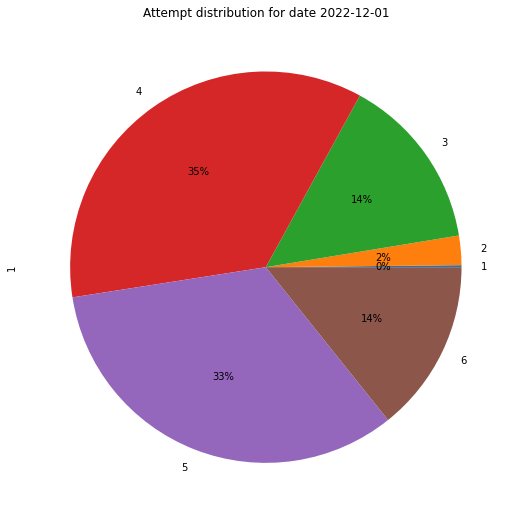

In [36]:
row.plot.pie(title='Attempt distribution for date '+tweets.iloc[1,0],autopct='%1.0f%%',explode=(0, 0, 0,0,0,0),figsize=(9, 9),labels=['1','2','3','4','5','6'],y=None)